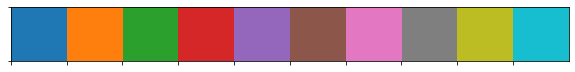

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import h5py

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["font.size"] = 26

#data_dir = "/home/stavros/DATA"
data_dir = "D:/ClockV3"
cp = sns.color_palette()
sns.palplot(cp)
plt.show()

In [31]:
file = h5py.File("{}/histories/sweepboth_mpsD4_N6M20.h5".format(data_dir), "r")
print(file.keys())

<KeysViewHDF5 ['avg_overlaps', 'exact_Eloc', 'growing_avg_overlaps', 'growing_exact_Eloc', 'growing_overlaps', 'overlaps']>


In [15]:
file["growing_exact_Eloc"][()].shape

(20, 1000)

In [32]:
file.close()

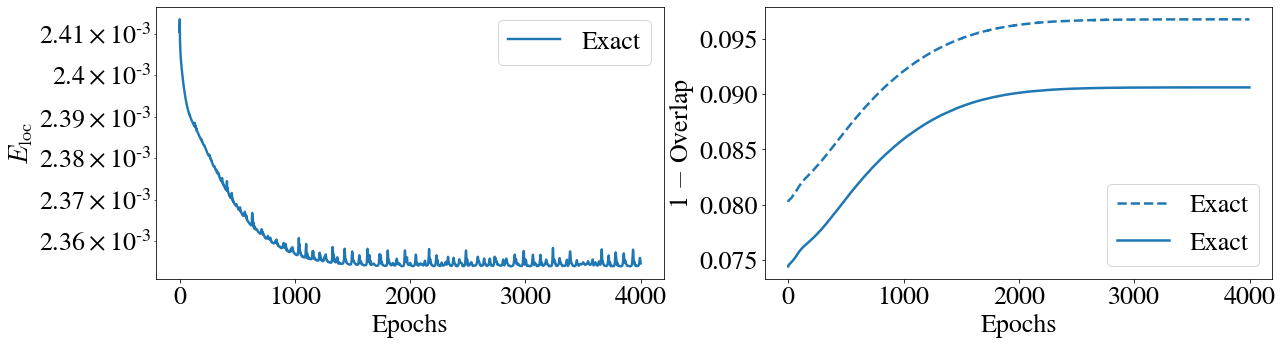

In [13]:
machine_type = "mpsD2"
n_sites = 6
time_steps = 20

all_states = h5py.File("{}/histories/allstatesgrow_{}_N{}M{}.h5".format(data_dir, machine_type, n_sites, time_steps), "r")

plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.semilogy(all_states["exact_Eloc"][()].real, label="Exact", color=cp[0], linewidth=2.4)
plt.xlabel("Epochs")
plt.ylabel("$E_\mathrm{loc}$")
plt.legend()

plt.subplot(122)
plt.plot(1 - all_states["overlaps"][()], label="Exact", linewidth=2.5, color=cp[0], linestyle="--")
plt.plot(1 - all_states["avg_overlaps"][()], label="Exact", linewidth=2.5, color=cp[0])
plt.xlabel("Epochs")
plt.ylabel("1 $-$ Overlap")
plt.legend()

plt.show()
all_states.close()

In [28]:
def get_grow_and_final(filename, quantity="exact_Eloc"):
    file = h5py.File("{}/histories/{}".format(data_dir, filename), "r")
    grow_heff = file["growing_{}".format(quantity)][()][-1, -1]
    if "sweep" in filename:
        final_heff = file["sweeping_{}".format(quantity)][()][-1, -1]
    else:
        final_heff = file[quantity][()][-1]
    file.close()
    return grow_heff, final_heff

D_list = [2, 3, 4, 5]
time_steps = 20

filename = lambda D: "allstatesgrow_mpsD{}_N{}M{}.h5".format(D, n_sites, time_steps)
res = np.array([get_grow_and_final(filename(D)) for D in D_list])

filename = lambda D: "sweepboth_mpsD{}_N{}M{}.h5".format(D, n_sites, time_steps)
sweep = np.array([get_grow_and_final(filename(D))[1] for D in D_list])

plt.figure(figsize=(7, 4))
plt.plot(D_list, res[:, 1], marker="o", linewidth=2.5, 
        markersize=8, color=cp[0], label="Global")
plt.plot(D_list, res[:, 0], marker="s", linewidth=2.5, 
         markersize=8, color=cp[2], label="Grow")
plt.plot(D_list, sweep, marker="d", linewidth=2.5, 
         markersize=8, color=cp[2], label="Sweep")
plt.axhline(y=2e-3, color="black", linestyle="--",
            linewidth=2.0, label="Exact Evolution")

plt.xlabel("$D$")
plt.ylabel(r"$\left \langle H_\mathrm{eff}\right \rangle$")
plt.legend(fontsize=18)
plt.show()

KeyError: "Unable to open object (object 'sweeping_exact_Eloc' doesn't exist)"

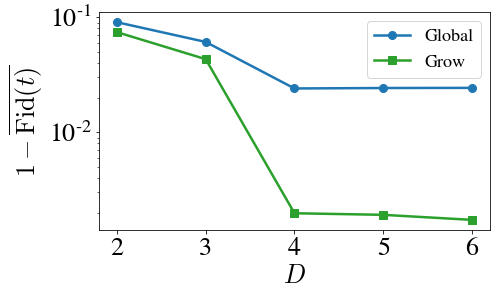

In [27]:
D_list = [2, 3, 4, 5, 6]
time_steps = 20
filename = lambda D: "allstatesgrow_mpsD{}_N{}M{}.h5".format(D, n_sites, time_steps)

res = np.array([get_grow_and_final(filename(D), quantity="avg_overlaps") for D in D_list])
res.shape

plt.figure(figsize=(7, 4))
plt.semilogy(D_list, 1 - res[:, 1], marker="o", linewidth=2.5, 
            markersize=8, color=cp[0], label="Global")
plt.semilogy(D_list, 1 - res[:, 0], marker="s", linewidth=2.5, 
             markersize=8, color=cp[2], label="Grow")

plt.xlabel("$D$")
plt.ylabel(r"$1 - \overline{\mathrm{Fid}(t)}$")
plt.legend(fontsize=18)
plt.show()